In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

2024-11-07 14:20:39.127575: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-07 14:20:39.145521: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-07 14:20:39.150886: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-07 14:20:39.164068: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Set up image data generators
train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load the training and testing data
train_generator = train_datagen.flow_from_directory(
    '/raid/home/minan/home/project/project/newdataset/train',  # Replace with the path to your training data
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    '/raid/home/minan/home/project/project/newdataset/test',  # Replace with the path to your test data
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 3999 images belonging to 2 classes.
Found 79 images belonging to 2 classes.


In [4]:

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top for binary classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1, activation='sigmoid')(x)  # Single unit for binary classification

# Define the final model
model = Model(inputs=base_model.input, outputs=x)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator
)

2024-11-07 14:22:05.229471: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38380 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:07:00.0, compute capability: 8.0
2024-11-07 14:22:05.231607: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 37598 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:0f:00.0, compute capability: 8.0
2024-11-07 14:22:05.234301: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 19963 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:47:00.0, compute capability: 8.0
2024-11-07 14:22:05.236154: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 26620 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-40GB, pci bu

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 16s 1us/step
Epoch 1/30


/raid/home/minan/home/project/project/myenv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1730969553.866075 1826141 service.cc:146] XLA service 0x7f8b6c002eb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730969553.866118 1826141 service.cc:154]   StreamExecutor device (0): NVIDIA A100-SXM4-40GB, Compute Capability 8.0
I0000 00:00:1730969553.866131 1826141 service.cc:154]   StreamExecutor device (1): NVIDIA A100-SXM4-40GB, Compute Capability 8.0
I0000 00:00:1730969553.866135 1826141 service.cc:154]   StreamExecutor device (2): NVIDIA A100-SXM4-40GB, Compute Capability 8.0
I0000 00:00:1730969553.866139 1826141 se

  1/125 ━━━━━━━━━━━━━━━━━━━━ 43:04 21s/step - accuracy: 0.3750 - loss: 0.6973

I0000 00:00:1730969565.759484 1826141 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


125/125 ━━━━━━━━━━━━━━━━━━━━ 74s 429ms/step - accuracy: 0.4977 - loss: 0.6937 - val_accuracy: 0.4937 - val_loss: 0.6947
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 34s 256ms/step - accuracy: 0.5047 - loss: 0.6940 - val_accuracy: 0.5063 - val_loss: 0.6940
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 32s 247ms/step - accuracy: 0.4989 - loss: 0.6945 - val_accuracy: 0.4937 - val_loss: 0.6933
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 245ms/step - accuracy: 0.4972 - loss: 0.6939 - val_accuracy: 0.5063 - val_loss: 0.6934
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 32s 243ms/step - accuracy: 0.5202 - loss: 0.6933 - val_accuracy: 0.4937 - val_loss: 0.6941
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 250ms/step - accuracy: 0.4835 - loss: 0.6952 - val_accuracy: 0.4937 - val_loss: 0.6959
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 245ms/step - accuracy: 0.4889 - loss: 0.6962 - val_accuracy: 0.4937 - val_loss: 0.6938
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 33s 249ms/step - accuracy: 0.4949 - loss: 0.6937 - val

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.5461 - loss: 0.6907
Test Accuracy: 50.63%


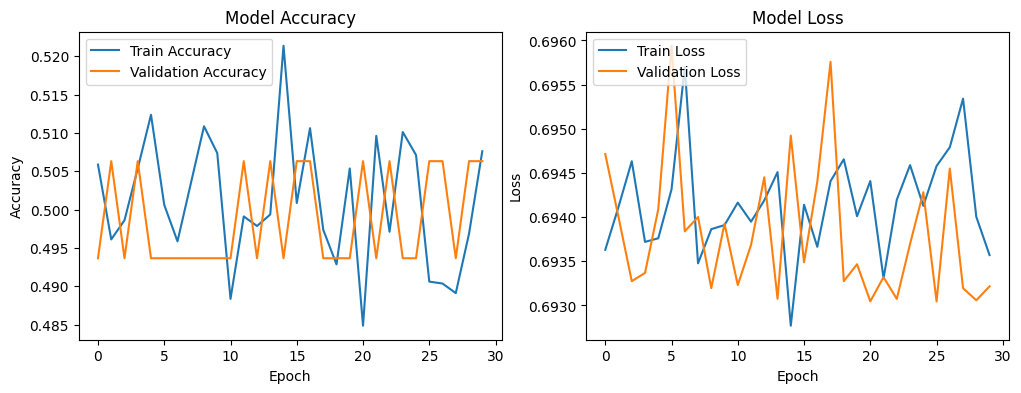

In [6]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Optional: Plot training and validation accuracy/loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()